# **Netflix : Data Exploration and Visualisation**

---



In [ ]:
#Importing the Python Libraries
import pandas as pd
import numpy as np

In [ ]:
#Creating a dataframe named "data"
data = pd.read_csv("netflix.csv")

In [ ]:
#Checking the shape of the Dataframe "data"
data.shape

(8807, 12)

In [ ]:
# Checking the basic info of the Dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#Displaying the top 5 rows of the Dataframe "data"
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Checking the number of unique values in each column
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
# Find the number of NaN vaues present in the Dataframe
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Handling NAN Values**

In [ ]:
# Filling the NaN vales of the column "rating" using the mode value

data["rating"].fillna(data["rating"].mode()[0],inplace=True)

In [ ]:
# Imputating the values as "Unknown" for the ["director","cast","country"] columns

data["director"].fillna("UnSpecified",inplace=True)
data["cast"].fillna("Unknown",inplace=True)
data["country"].fillna(data["country"].mode()[0],inplace=True)

In [ ]:
# Filling the NaN vales of the column "date_added" using the mode value

data["date_added"].fillna(data["date_added"].mode()[0],inplace=True)

In [ ]:
# Filling the NaN vales of the column "duration" using the mode value

data["duration"].fillna(data["duration"].mode()[0],inplace=True)

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,UnSpecified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,UnSpecified,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,UnSpecified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Confirming the NaN values available in the dataframe

data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**Cleaning and sanitizing the dataframe "data"**

In [ ]:
# Unnesting the data from column director

director = pd.DataFrame(data["director"].apply(lambda x : str(x).split(", ")).tolist() , index = data["show_id"]).stack()
director = director.reset_index().drop("level_1",axis=1)
director.rename (columns = {0:"Director"}, inplace=True)
director

,show_id,Director
0,s1,Kirsten Johnson
1,s2,UnSpecified
2,s3,Julien Leclercq
3,s4,UnSpecified
4,s5,UnSpecified
...,...,...
9607,s8803,David Fincher
9608,s8804,UnSpecified
9609,s8805,Ruben Fleischer
9610,s8806,Peter Hewitt


In [ ]:
# Unnesting the data from column cast

cast = pd.DataFrame(data["cast"].apply( lambda x : str(x).split(", ")).tolist() , index = data["show_id"]).stack()
cast = cast.reset_index().drop("level_1",axis=1)
cast.rename(columns = {0:"Cast"},inplace=True)
cast

,show_id,Cast
0,s1,Unknown
1,s2,Ama Qamata
2,s2,Khosi Ngema
3,s2,Gail Mabalane
4,s2,Thabang Molaba
...,...,...
64946,s8807,Manish Chaudhary
64947,s8807,Meghna Malik
64948,s8807,Malkeet Rauni
64949,s8807,Anita Shabdish


In [ ]:
# Unnesting the data from column country

country = pd.DataFrame(data["country"].apply(lambda x : str(x).split(", ")).tolist() , index = data["show_id"]).stack()
country = country.reset_index().drop("level_1",axis=1)
country.rename(columns = {0:"Country"},inplace = True)
country

,show_id,Country
0,s1,United States
1,s2,South Africa
2,s3,United States
3,s4,United States
4,s5,India
...,...,...
10840,s8803,United States
10841,s8804,United States
10842,s8805,United States
10843,s8806,United States


In [ ]:
# Unnesting the data from column listed_in

listed_in = pd.DataFrame(data["listed_in"].apply(lambda x : str(x).split(", ")).tolist() ,  index = data["show_id"]).stack()
listed_in = listed_in.reset_index().drop("level_1",axis = 1)
listed_in.rename(columns = {0:"Listed_in"},inplace = True)
listed_in

,show_id,Listed_in
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
4,s3,Crime TV Shows
...,...,...
19318,s8806,Children & Family Movies
19319,s8806,Comedies
19320,s8807,Dramas
19321,s8807,International Movies


***Merging all the dataframes to the original dataframe ***

In [ ]:
# Merging all the dataFrames together as a single Frame

x = director.merge(cast , on ="show_id" , how ="inner")
y = x.merge(country , on ="show_id" , how = "inner")
unnested_data = y.merge(listed_in , on = "show_id" , how = "inner")
unnested_data

,show_id,Director,Cast,Country,Listed_in
0,s1,Kirsten Johnson,Unknown,United States,Documentaries
1,s2,UnSpecified,Ama Qamata,South Africa,International TV Shows
2,s2,UnSpecified,Ama Qamata,South Africa,TV Dramas
3,s2,UnSpecified,Ama Qamata,South Africa,TV Mysteries
4,s2,UnSpecified,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...
201986,s8807,Mozez Singh,Anita Shabdish,India,International Movies
201987,s8807,Mozez Singh,Anita Shabdish,India,Music & Musicals
201988,s8807,Mozez Singh,Chittaranjan Tripathy,India,Dramas
201989,s8807,Mozez Singh,Chittaranjan Tripathy,India,International Movies


In [ ]:
# Merging the unnested dataFrame to the original dataframe "data"

data_cleaned = data.merge(unnested_data , on = "show_id" , how = "inner")
data_cleaned.drop(columns = ["director" , "country" , "cast" , "listed_in"],inplace = True)
data_cleaned.head()


,show_id,type,title,date_added,release_year,rating,duration,description,Director,Cast,Country,Listed_in
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,Unknown,United States,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",UnSpecified,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",UnSpecified,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",UnSpecified,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",UnSpecified,Khosi Ngema,South Africa,International TV Shows


In [ ]:
# Shape of the cleaned and preprocessed data

data_cleaned.shape

(201991, 12)

In [ ]:
data_cleaned.isna().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
Director        0
Cast            0
Country         0
Listed_in       0
dtype: int64

**Checking the unique values for the columns in the dataframe**

In [ ]:
data_cleaned["Director"].value_counts()

Director
UnSpecified            50643
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
                       ...  
Richard Maurice            1
Richard E. Norman          1
Spencer Williams           1
Oscar Micheaux             1
Kirsten Johnson            1
Name: count, Length: 4994, dtype: int64

In [ ]:
data_cleaned["Cast"].value_counts()

Cast
Unknown           2146
Liam Neeson        161
Alfred Molina      160
John Krasinski     139
Salma Hayek        130
                  ... 
Dario Yazbek         1
Corinne Foxx         1
Jacob Craner         1
Laila Berzins        1
Richard Ryan         1
Name: count, Length: 36440, dtype: int64

In [ ]:
data_cleaned["Country"].value_counts()

Country
United States     71246
India             22814
United Kingdom    12945
Japan              8679
France             8254
                  ...  
Palestine             2
Kazakhstan            1
Nicaragua             1
United States,        1
Uganda                1
Name: count, Length: 127, dtype: int64

In [ ]:
data_cleaned["Listed_in"].value_counts()

Listed_in
Dramas                          29775
International Movies            28211
Comedies                        20829
International TV Shows          12845
Action & Adventure              12216
Independent Movies               9834
Children & Family Movies         9771
TV Dramas                        8942
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4963
Crime TV Shows                   4733
Horror Movies                    4571
Kids' TV                         4568
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2407
Anime Series                     2313
TV Action & Adventure            2288
Spanish-Language TV Shows        2126
British TV Shows                 1808
Sports Movies                    1531
Classic Movies                   1434
TV Mysteries                     1281
Korean TV Shows                  1122
Cu

In [ ]:
data_cleaned["Director"].unique()

array(['Kirsten Johnson', 'UnSpecified', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [ ]:
data_cleaned["Cast"].unique()

array(['Unknown', 'Ama Qamata', 'Khosi Ngema', ..., 'Malkeet Rauni',
       'Anita Shabdish', 'Chittaranjan Tripathy'], dtype=object)

In [ ]:
data_cleaned["Country"].unique()

array(['United States', 'South Africa', 'India', 'Ghana', 'Burkina Faso',
       'United Kingdom', 'Germany', 'Ethiopia', 'Czech Republic',
       'Mexico', 'Turkey', 'Australia', 'France', 'Finland', 'China',
       'Canada', 'Japan', 'Nigeria', 'Spain', 'Belgium', 'South Korea',
       'Singapore', 'Italy', 'Romania', 'Argentina', 'Venezuela',
       'Hong Kong', 'Russia', '', 'Ireland', 'Nepal', 'New Zealand',
       'Brazil', 'Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel',
       'Taiwan', 'Bulgaria', 'Algeria', 'Poland', 'Saudi Arabia',
       'Thailand', 'Indonesia', 'Egypt', 'Denmark', 'Kuwait',
       'Netherlands', 'Malaysia', 'Vietnam', 'Hungary', 'Sweden',
       'Lebanon', 'Syria', 'Philippines', 'Iceland',
       'United Arab Emirates', 'Norway', 'Qatar', 'Mauritius', 'Austria',
       'Cameroon', 'Palestine', 'Uruguay', 'United Kingdom,', 'Kenya',
       'Chile', 'Luxembourg', 'Cambodia', 'Bangladesh', 'Portugal',
       'Cayman Islands', 'Senegal', 'Serbia', 'Ma

In [ ]:
data_cleaned["Listed_in"].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

**Converting the "date_added" column to DateTime format**

In [ ]:
#Converting the "date_added" column to proper date and time format

data_cleaned["date_added"] = pd.to_datetime(data_cleaned["date_added"] , format="%B %d, %Y", errors="coerce")
data_cleaned["date_added"] = pd.to_datetime(data_cleaned["date_added"])
data_cleaned.head()

,show_id,type,title,date_added,release_year,rating,duration,description,Director,Cast,Country,Listed_in
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,Unknown,United States,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",UnSpecified,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",UnSpecified,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",UnSpecified,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",UnSpecified,Khosi Ngema,South Africa,International TV Shows


In [ ]:
data_cleaned["date_added"].fillna(data_cleaned["date_added"].mode()[0] , inplace=True)

**Extracting Year , Month and Day from the date_addded column**

In [ ]:
#Extracting the year , month and day for each value from the "date_added" column and creating seperate columns for each

data_cleaned["year_added"] = data_cleaned["date_added"].dt.year
data_cleaned["month_added"] = data_cleaned["date_added"].dt.month
data_cleaned["day_added"] = data_cleaned["date_added"].dt.day

data_cleaned.head()

,show_id,type,title,date_added,release_year,rating,duration,description,Director,Cast,Country,Listed_in,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,Unknown,United States,Documentaries,2021,9,25
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",UnSpecified,Ama Qamata,South Africa,International TV Shows,2021,9,24
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",UnSpecified,Ama Qamata,South Africa,TV Dramas,2021,9,24
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",UnSpecified,Ama Qamata,South Africa,TV Mysteries,2021,9,24
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",UnSpecified,Khosi Ngema,South Africa,International TV Shows,2021,9,24


In [ ]:
data_cleaned.isna().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
Director        0
Cast            0
Country         0
Listed_in       0
year_added      0
month_added     0
day_added       0
dtype: int64

**Segregation of the integer value from the "duration" column**

In [ ]:
#Segregating the integer values from the duration and saving as duration_value

data_cleaned["duration_value"] = data_cleaned["duration"].apply(lambda x : int(str(x).split(" ")[0]))
data_cleaned.head()

,show_id,type,title,date_added,release_year,rating,duration,description,Director,Cast,Country,Listed_in,year_added,month_added,day_added,duration_value
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,Unknown,United States,Documentaries,2021,9,25,90
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",UnSpecified,Ama Qamata,South Africa,International TV Shows,2021,9,24,2
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",UnSpecified,Ama Qamata,South Africa,TV Dramas,2021,9,24,2
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",UnSpecified,Ama Qamata,South Africa,TV Mysteries,2021,9,24,2
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",UnSpecified,Khosi Ngema,South Africa,International TV Shows,2021,9,24,2


**Checking for Duplicates**

In [ ]:
data_cleaned.loc[data_cleaned.duplicated()].head()

,show_id,type,title,date_added,release_year,rating,duration,description,Director,Cast,Country,Listed_in,year_added,month_added,day_added,duration_value
39336,s1632,Movie,Rust Creek,2020-11-30,2018,R,108 min,A wrong turn in the woods becomes a fight for ...,Jen McGowan,Micah Hauptman,United States,Thrillers,2020,11,30,108
88516,s3719,Movie,Blood Will Tell,2019-06-21,2019,TV-MA,113 min,Family patriarch Elías begins to unravel after...,Miguel Cohan,Oscar Martínez,Argentina,Dramas,2019,6,21,113
88517,s3719,Movie,Blood Will Tell,2019-06-21,2019,TV-MA,113 min,Family patriarch Elías begins to unravel after...,Miguel Cohan,Oscar Martínez,Argentina,Independent Movies,2019,6,21,113
88518,s3719,Movie,Blood Will Tell,2019-06-21,2019,TV-MA,113 min,Family patriarch Elías begins to unravel after...,Miguel Cohan,Oscar Martínez,Argentina,International Movies,2019,6,21,113
88519,s3719,Movie,Blood Will Tell,2019-06-21,2019,TV-MA,113 min,Family patriarch Elías begins to unravel after...,Miguel Cohan,Oscar Martínez,United States,Dramas,2019,6,21,113


In [ ]:
data_cleaned.shape

(201991, 16)

**Cleaning the duplicate rows**

In [ ]:
data_cleaned.drop_duplicates(keep = "first" , inplace = True)

**Checking for inappropriate values in Country and dropping them**

In [ ]:
data_cleaned[data_cleaned["Country"]==""].head()

,show_id,type,title,date_added,release_year,rating,duration,description,Director,Cast,Country,Listed_in,year_added,month_added,day_added,duration_value
4737,s194,TV Show,D.P.,2021-08-27,2021,TV-MA,1 Season,A young private’s assignment to capture army d...,UnSpecified,Jung Hae-in,,International TV Shows,2021,8,27,1
4738,s194,TV Show,D.P.,2021-08-27,2021,TV-MA,1 Season,A young private’s assignment to capture army d...,UnSpecified,Jung Hae-in,,TV Dramas,2021,8,27,1
4741,s194,TV Show,D.P.,2021-08-27,2021,TV-MA,1 Season,A young private’s assignment to capture army d...,UnSpecified,Koo Kyo-hwan,,International TV Shows,2021,8,27,1
4742,s194,TV Show,D.P.,2021-08-27,2021,TV-MA,1 Season,A young private’s assignment to capture army d...,UnSpecified,Koo Kyo-hwan,,TV Dramas,2021,8,27,1
4745,s194,TV Show,D.P.,2021-08-27,2021,TV-MA,1 Season,A young private’s assignment to capture army d...,UnSpecified,Kim Sung-kyun,,International TV Shows,2021,8,27,1


In [ ]:
data_cleaned.drop(data_cleaned[data_cleaned["Country"]==""].index , inplace = True )

**General exploration of the cleaned and processed data**

In [ ]:
data_cleaned.shape

(201904, 16)

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201904 entries, 0 to 201990
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   show_id         201904 non-null  object        
 1   type            201904 non-null  object        
 2   title           201904 non-null  object        
 3   date_added      201904 non-null  datetime64[ns]
 4   release_year    201904 non-null  int64         
 5   rating          201904 non-null  object        
 6   duration        201904 non-null  object        
 7   description     201904 non-null  object        
 8   Director        201904 non-null  object        
 9   Cast            201904 non-null  object        
 10  Country         201904 non-null  object        
 11  Listed_in       201904 non-null  object        
 12  year_added      201904 non-null  int32         
 13  month_added     201904 non-null  int32         
 14  day_added       201904 non-null  int32   

In [ ]:
data_cleaned.isna().sum()

show_id           0
type              0
title             0
date_added        0
release_year      0
rating            0
duration          0
description       0
Director          0
Cast              0
Country           0
Listed_in         0
year_added        0
month_added       0
day_added         0
duration_value    0
dtype: int64

In [ ]:
data_cleaned.nunique()

show_id            8807
type                  2
title              8807
date_added         1699
release_year         74
rating               17
duration            220
description        8775
Director           4994
Cast              36440
Country             126
Listed_in            42
year_added           14
month_added          12
day_added            31
duration_value      210
dtype: int64

**Writing the data back to the file**

In [ ]:
data_cleaned.to_csv("netflix_data.csv", index = False)

**Creating Charts for better Visualization and Analysis**

---



In [ ]:
# Importing the required Pyhton Libraries

import matplotlib.pyplot as plt
import seaborn as sns

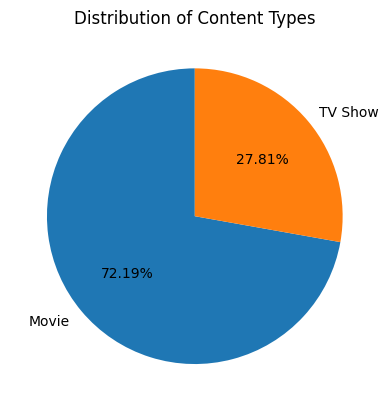

In [ ]:
# Analysing the percentage of show type added in Netflix

data_count = data_cleaned.groupby(["type"])["type"].count()
data_len = len(data_cleaned)
percentage = (data_count/data_len) * 100

df = pd.DataFrame(percentage)

plt.pie( df["type"],
        labels = df.index,
         startangle = 90,
         autopct = "%.2f%%")

plt.title("Distribution of Content Types")
plt.show()

**Insight :**

The pie chart clearly specifies that about 72.19% of the total content added in Netflix is Movie whereas the remaining 27.81% are TV Shows.

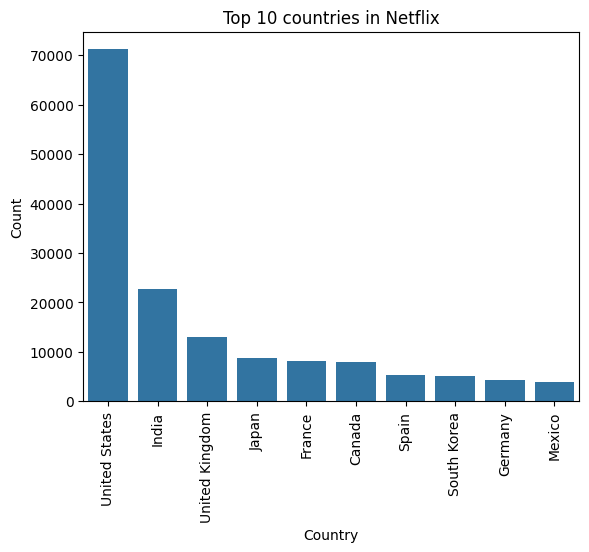

In [ ]:
# Analysing the popularity of Netflix in various countries

top_10 = data_cleaned["Country"].value_counts()[:10]

bar_chart = sns.barplot( x = top_10.index ,
                        y = top_10 )
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Top 10 countries in Netflix")

plt.show()

**Insight :**

By visualizing the bar chart its clear that Netflix is very much popular in the United States followed by India and United Kingdom.

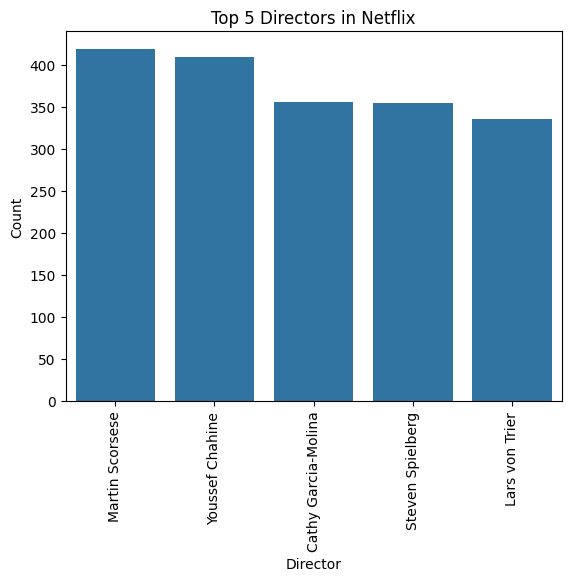

In [ ]:
# Analysing the top 5 Directors

director_5 = data_cleaned["Director"].value_counts()[1:6]

plot = sns.barplot(x = director_5.index ,
                   y = director_5)
plt.xticks(rotation = 90)
plt.xlabel("Director")
plt.ylabel("Count")
plt.title("Top 5 Directors in Netflix")

plt.show()

**Insight :**

By analysing the bar chart its pretty much clear that Director Martin Scorsese has directed more number of content that has been added to Netflix.

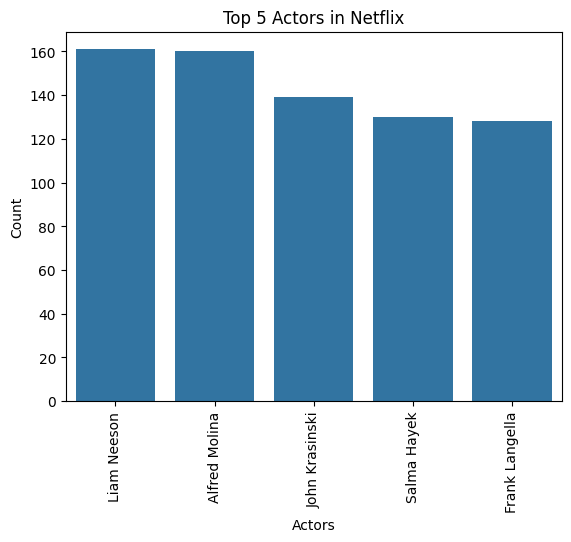

In [ ]:
# Analysing the top 5 Actors

actor_5 = data_cleaned["Cast"].value_counts()[1:6]

plot = sns.barplot(x = actor_5.index ,
                   y = actor_5)
plt.xticks(rotation = 90)
plt.xlabel("Actors")
plt.ylabel("Count")
plt.title("Top 5 Actors in Netflix")

plt.show()

**Insight :**

The bar graph helps us visualize that Actor Liam Neeson has acted in most of the content available in Netflix.

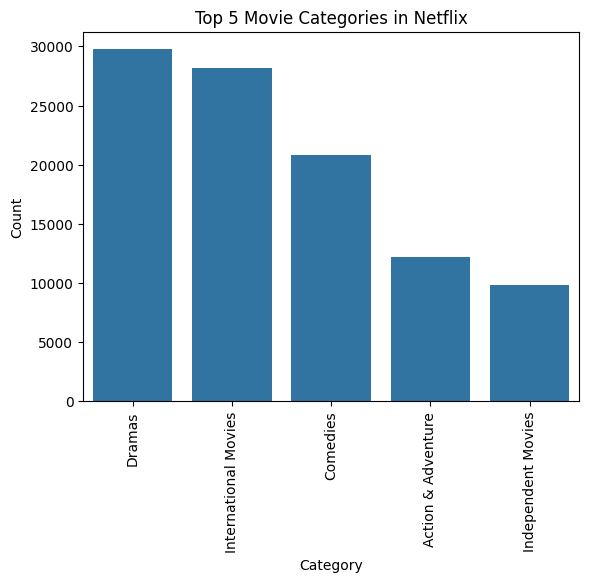

In [ ]:
# Analysing the top 5 Movie category

movie = pd.DataFrame(data_cleaned[data_cleaned["type"]=="Movie"]).reset_index()
movie_5 = movie["Listed_in"].value_counts()[:5]

plot = sns.barplot(x = movie_5.index ,
                   y = movie_5)
plt.xticks(rotation = 90)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Top 5 Movie Categories in Netflix")

plt.show()


**Insight :**

Analysing the bar chart helps us understand that the Genre Dramas is very much popular among the type Movie.

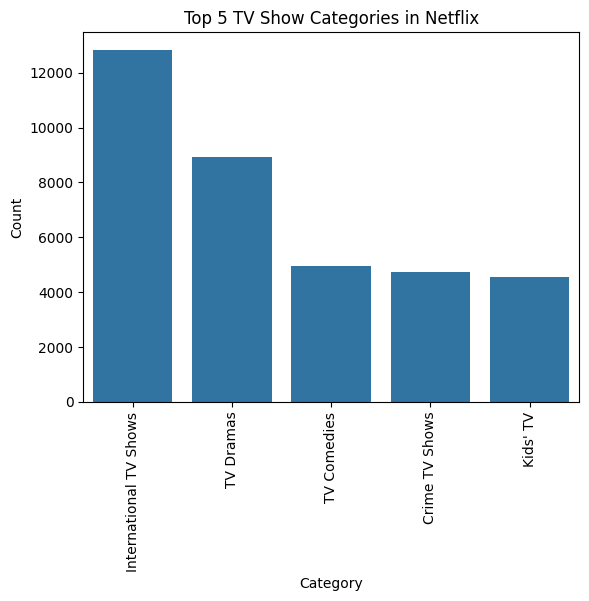

In [ ]:
# Analysing the top 5 TV Show category

tv_show = pd.DataFrame(data_cleaned[data_cleaned["type"]=="TV Show"]).reset_index()
tv_show_5 = tv_show["Listed_in"].value_counts()[:5]

plot = sns.barplot(x = tv_show_5.index ,
                   y = tv_show_5 )
plt.xticks(rotation = 90)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Top 5 TV Show Categories in Netflix")

plt.show()


**Insight :**

Analysing the bar chart helps us understand that the Genre International TV Shows is very much popular among the type TV Show.

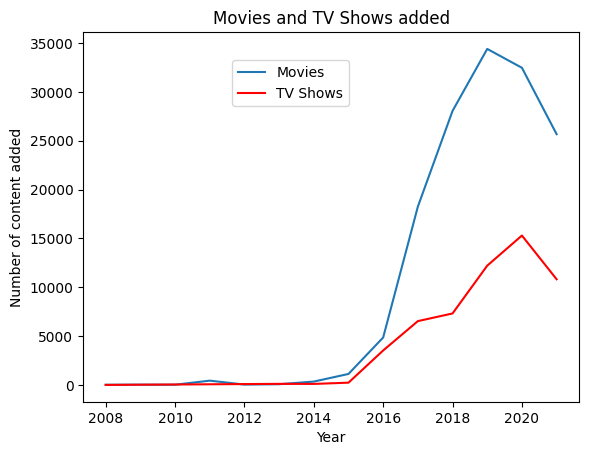

In [ ]:
# Analysing the Movies and TV Shows added to Netflix

movies = data_cleaned[data_cleaned["type"]=="Movie"]
show = data_cleaned[data_cleaned["type"]=="TV Show"]

movies_no = movies["year_added"].value_counts().sort_index()
show_no = show["year_added"].value_counts().sort_index()

sns.lineplot(x = movies_no.index , y= movies_no, label = "Movies")
sns.lineplot(x = show_no.index , y = show_no, color = "red", label = "TV Shows")
plt.legend(loc = (0.3, 0.8))

plt.xlabel("Year")
plt.ylabel("Number of content added")
plt.title("Movies and TV Shows added")

plt.show()

**Insight :**

The KDE Plot helps us analys that there a sudden increase in the addition of content to Netflix from 2015 which again shows a decrease after 2020.

Most number of Movies were added in the year 2019 and most TV Shows were added in 2020.

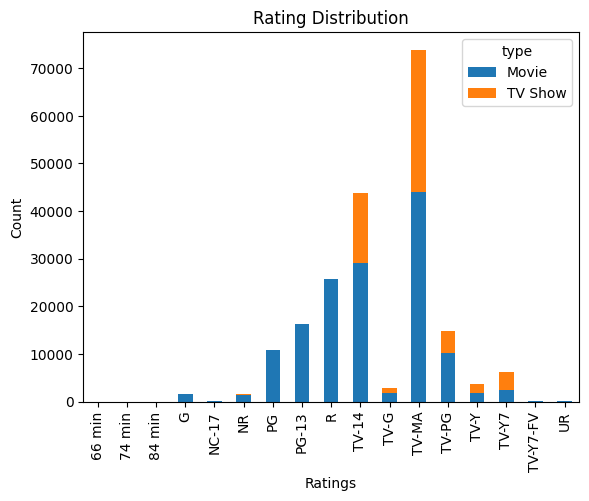

In [ ]:
# Checking on the rating distribution

new_plot = pd.crosstab(index = data_cleaned["rating"], columns = data_cleaned["type"])

new_plot.plot(kind = "bar" , stacked = True)
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Rating Distribution")

plt.show()

**Insight :**

The Stacked bar plot clearly specifies that majority of the TV Shows and Movies are of rating TV-MA (Matured Audience) followed by TV-14.

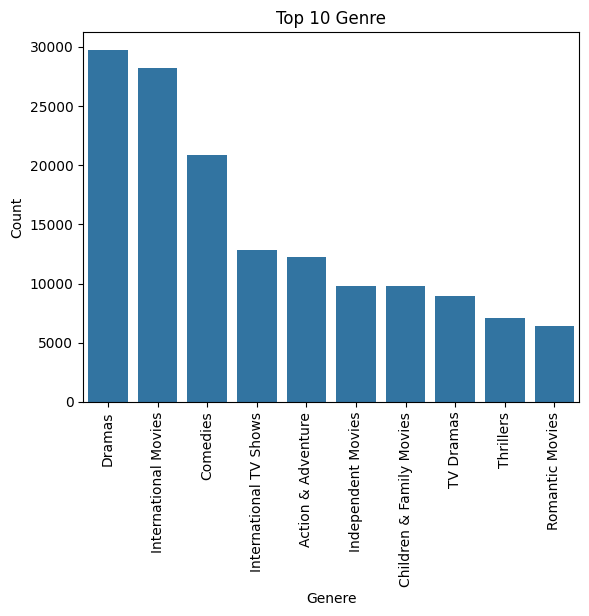

In [ ]:
# Analysing the top 10 Genres in Netflix

genere = data_cleaned["Listed_in"].value_counts()[:10]

sns.barplot(x = genere.index , y = genere)

plt.xticks(rotation = 90)
plt.xlabel("Genere")
plt.ylabel("Count")
plt.title("Top 10 Genre")

plt.show()

**Insight :**

Among all the 42 Genre available in Netflix Dramas is the most popular Genre.

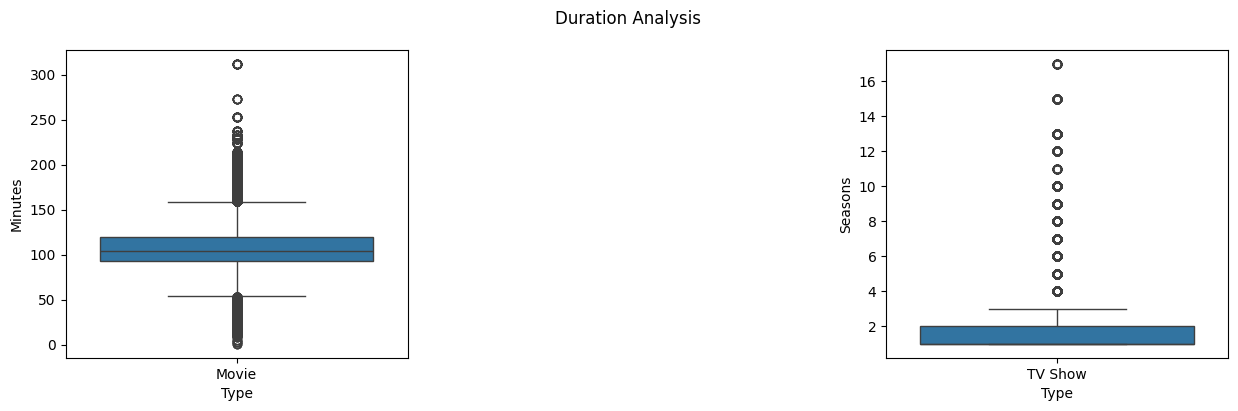

In [ ]:
# Duration analysis for Movies and TV Shows

movies = data_cleaned[data_cleaned["type"]=="Movie"]
show = data_cleaned[data_cleaned["type"]=="TV Show"]

fig = plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.boxplot(data = movies , x = "type" , y = "duration_value")
plt.xlabel("Type")
plt.ylabel("Minutes")

plt.subplot(1,3,3)
sns.boxplot(data = show , x = "type" , y = "duration_value")
plt.xlabel("Type")
plt.ylabel("Seasons")

fig.suptitle("Duration Analysis")
plt.show()

**Insight :**

The box plot helps us understand that Movies have an average duration around 100 mins and movies having duration more that 150 mins are considered to be outliners.

In TV Shows, they have an average of 2 seasons where as more than 3 seasons are considered as outliners.

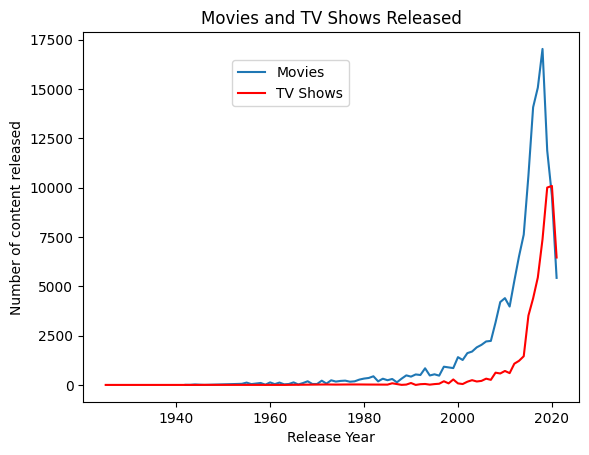

In [ ]:
# Analysing the Movies and TV Shows release year

movies = data_cleaned[data_cleaned["type"]=="Movie"]
show = data_cleaned[data_cleaned["type"]=="TV Show"]

movies_no = movies["release_year"].value_counts().sort_index()
show_no = show["release_year"].value_counts().sort_index()

sns.lineplot(x = movies_no.index , y= movies_no, label = "Movies")
sns.lineplot(x = show_no.index , y = show_no, color = "red", label = "TV Shows")
plt.legend(loc = (0.3, 0.8))

plt.xlabel("Release Year")
plt.ylabel("Number of content released")
plt.title("Movies and TV Shows Released")

plt.show()

**Insight :**

The line plot clearly visualises that initially there were very minimal number of movies or TV shows released , which had a steady increase from 2000's leading to a maximum around 2018 to 2020.

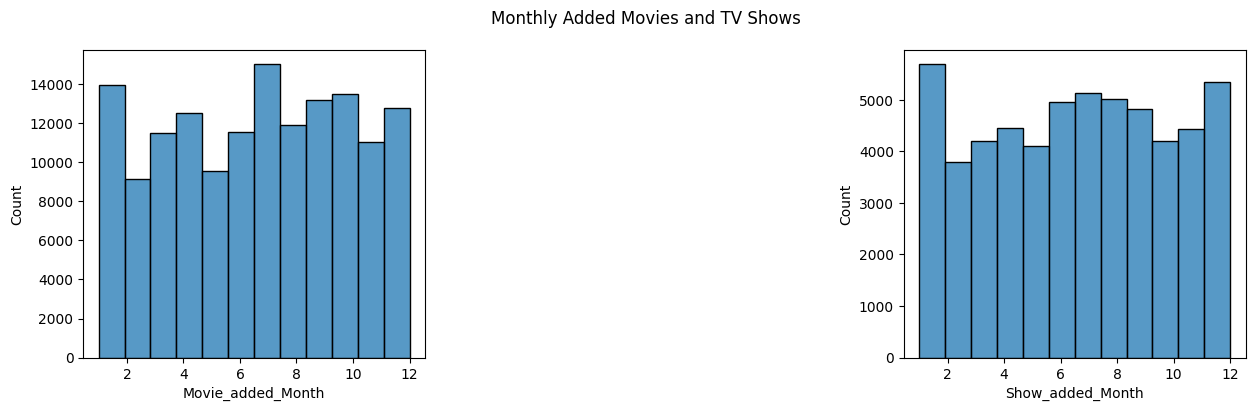

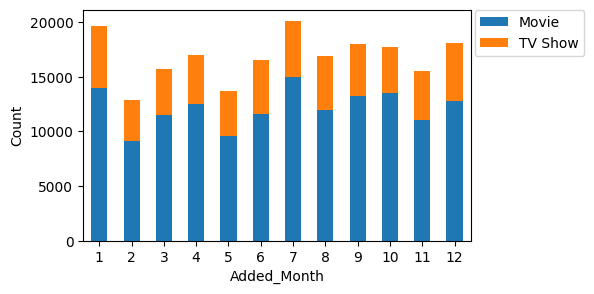

In [ ]:
# Analysing the month in which Movies and TV Shows were added

movies = data_cleaned[data_cleaned["type"]=="Movie"]
show = data_cleaned[data_cleaned["type"]=="TV Show"]


fig = plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.histplot(movies["month_added"], bins=12)
plt.xlabel("Movie_added_Month")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.histplot(show["month_added"], bins=12)
plt.xlabel("Show_added_Month")
plt.ylabel("Count")

new_plot = pd.crosstab(index = data_cleaned["month_added"], columns = data_cleaned["type"])
new_plot.plot(kind = "bar" , stacked = True , figsize = (5,3))
plt.xticks(rotation = 0)
plt.xlabel("Added_Month")
plt.ylabel("Count")
plt.legend(loc =(1.01,0.8))


fig.suptitle('Monthly Added Movies and TV Shows')
plt.show()

**Insight :**

By visualizing the stacked bar graph its very clear that most of the contents were added in the month of July.

By analysing the Histograms most of the movies were added in the month of July whereas most of the TV Shows were added in the month of January.

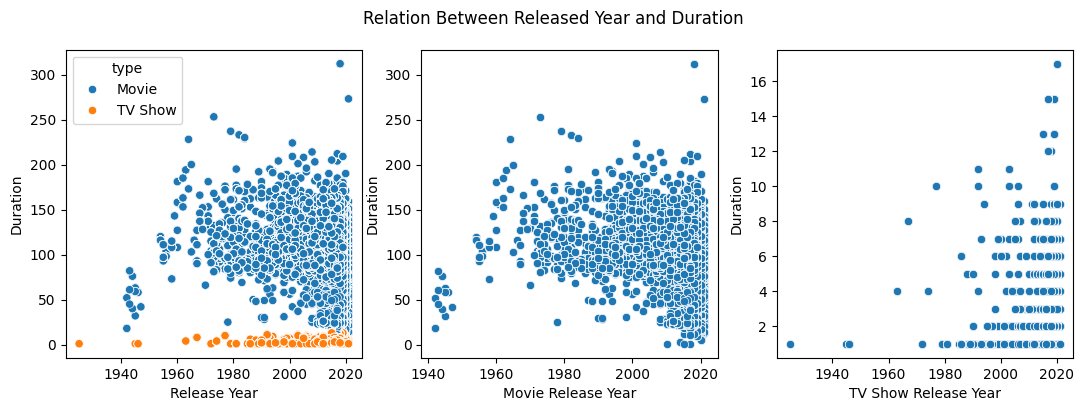

In [ ]:
# Analysing the relation between the Release and Added Year

movies = data_cleaned[data_cleaned["type"]=="Movie"]
show = data_cleaned[data_cleaned["type"]=="TV Show"]

fig = plt.figure(figsize=(13,4))

plt.subplot(1,3,1)
sns.scatterplot(x="release_year" , y = "duration_value" , hue ="type" , data = data_cleaned)
plt.xlabel("Release Year")
plt.ylabel("Duration")

plt.subplot(1,3,2)
sns.scatterplot(x="release_year" , y = "duration_value" , data = movies)
plt.xlabel("Movie Release Year")
plt.ylabel("Duration")

plt.subplot(1,3,3)
sns.scatterplot(x="release_year" , y = "duration_value" , data = show)
plt.xlabel("TV Show Release Year")
plt.ylabel("Duration")
fig.suptitle("Relation Between Released Year and Duration")
plt.show()

**Insight :**

Most of the movies which were released after 2000 have stabilized to a duration between 100 to 150 minutes and most of the TV shows are made with seasons between 2 to 4 which are most loved by the audiences.

In [ ]:
# Extracting the top 3 directors with top 3 rating

top_3_director = data_cleaned["Director"].value_counts().index[1:11]
top_3_rating = data_cleaned["rating"].value_counts().index[:3]
top_3_data = data_cleaned.loc[(data_cleaned["Director"].isin(top_3_director))  & (data_cleaned["rating"].isin(top_3_rating))]
top_3_data.head()


,show_id,type,title,date_added,release_year,rating,duration,description,Director,Cast,Country,Listed_in,year_added,month_added,day_added,duration_value
5071,s206,Movie,Kyo Kii... Main Jhuth Nahin Bolta,2021-08-27,2001,TV-14,150 min,The life and career of a lawyer are thrown int...,David Dhawan,Govinda,India,Comedies,2021,8,27,150
5072,s206,Movie,Kyo Kii... Main Jhuth Nahin Bolta,2021-08-27,2001,TV-14,150 min,The life and career of a lawyer are thrown int...,David Dhawan,Govinda,India,International Movies,2021,8,27,150
5073,s206,Movie,Kyo Kii... Main Jhuth Nahin Bolta,2021-08-27,2001,TV-14,150 min,The life and career of a lawyer are thrown int...,David Dhawan,Govinda,India,Sci-Fi & Fantasy,2021,8,27,150
5074,s206,Movie,Kyo Kii... Main Jhuth Nahin Bolta,2021-08-27,2001,TV-14,150 min,The life and career of a lawyer are thrown int...,David Dhawan,Sushmita Sen,India,Comedies,2021,8,27,150
5075,s206,Movie,Kyo Kii... Main Jhuth Nahin Bolta,2021-08-27,2001,TV-14,150 min,The life and career of a lawyer are thrown int...,David Dhawan,Sushmita Sen,India,International Movies,2021,8,27,150


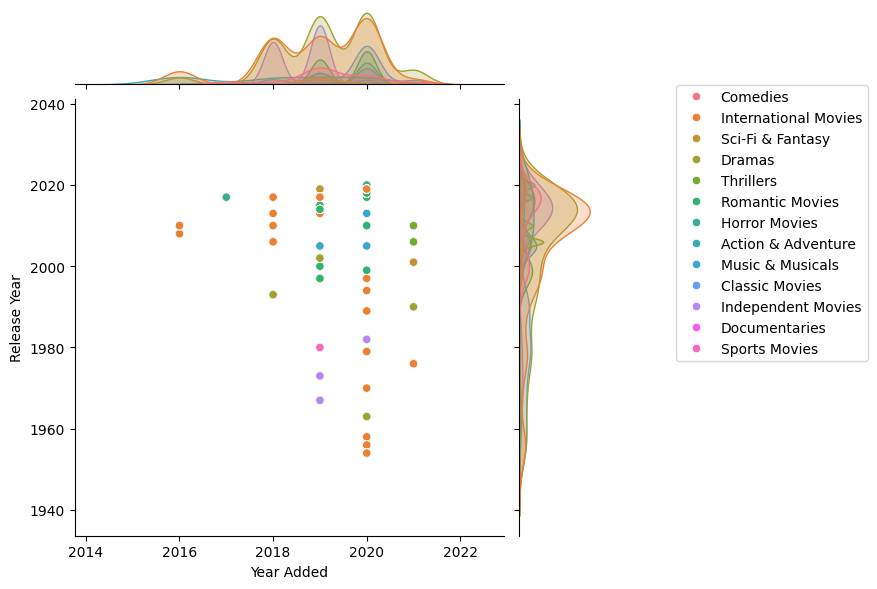

In [ ]:
# Analysing the top 3 data with respect to the Released year , Year added and the Genre

sns.jointplot(x="year_added" , y="release_year" , hue ="Listed_in" , data = top_3_data)
plt.legend(loc =(1.4,0.4))
plt.xlabel("Year Added")
plt.ylabel("Release Year")

plt.show()

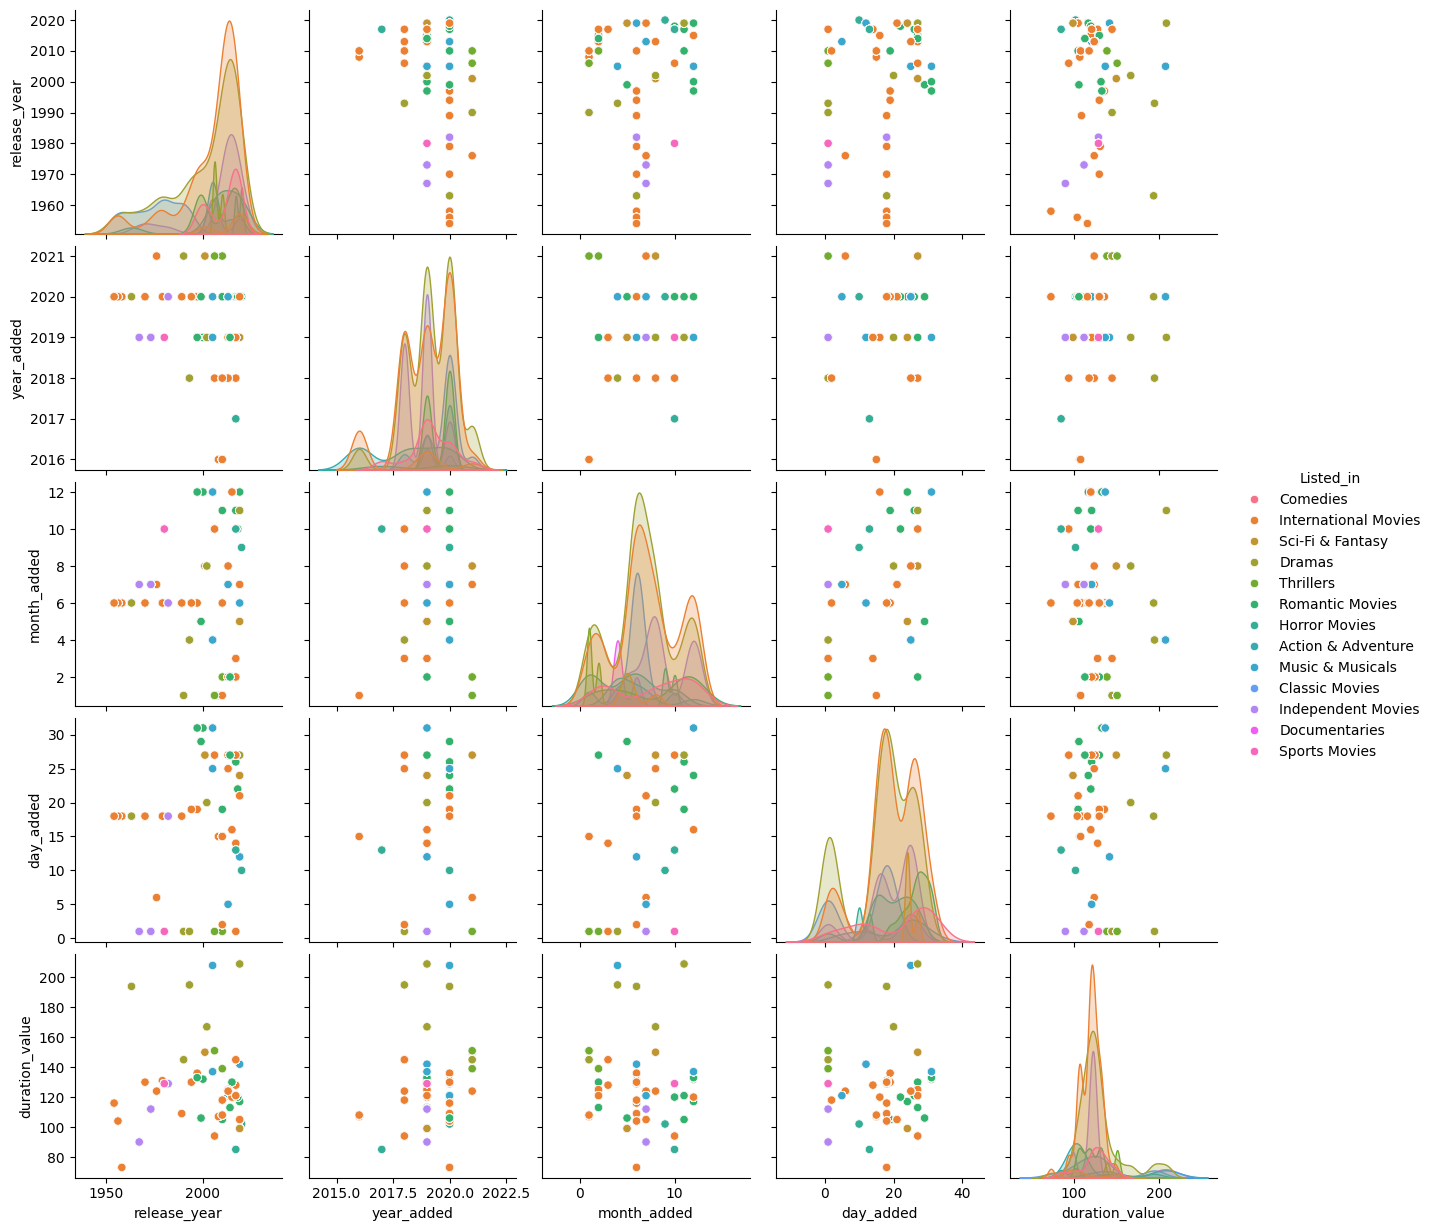

In [ ]:
# Analysing using pair plot for the top 3 data

sns.pairplot(data=top_3_data , hue = "Listed_in")
plt.show()

**Recommendation :**



*   As TV Shows occupy just 30% of the total content Netflix can add more TV Shows rather than movies.
*   As Netflix is very much popular in United States where as the other countries have relatively very least popularity , Netflix can focus and increase it popularity in other countries as well.

*   As there was a huge add in content in the year between 2018 and 2020 which is followed by a deep reduce, it needs to be noticed and managed .
*   Most of the content added are of rating Matured Audience only , hence its very much import to attract other age group audience as well which can be done by adding contents with other ratings as well.

*   TV Shows with seasons between 2 to 4 and Movies with duration 100 to 150 minutes are more preferred by the audience, hence contents can be added as per that.
*   Strong positive associations were observed between various genres, such as TV dramas and international TV shows, romantic and international TV shows, and independent movies and dramas. These correlations provide insights into viewer preferences and content interconnections.





